# Unit 1 Capstone Report

In this research study, I took an in depth look at the Athens Airbnb listings data set. I plotted the various information in multiple ways to get a good look at how the price interacts with each other varible and deduce whether or not there is a way to maximize profit in an effective way

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
athens = pd.read_csv('athens_listing_2.csv')

Created the data frame

In [4]:
print(athens)

      price  reviews_per_month  number_of_reviews  availability_365
0         0               0.74                 11                 0
1         0               0.53                  6               344
2        10               0.04                  1                 0
3        10               1.65                 46               178
4        10               3.94                192               343
5        10               0.96                 38               365
6        10               1.25                 48               365
7        10               0.34                 13               365
8        10               1.79                 69               365
9        10               1.31                 50               365
10       10               2.44                 92               360
11       10               0.57                 22               365
12       10               0.26                 10               365
13       10               0.76                 2

In [5]:
athens.mean()

price                 62.236497
reviews_per_month      2.493309
number_of_reviews     29.581666
availability_365     237.708844
dtype: float64

Found the means of the date frame

In [6]:
athens.min()

price                0.00
reviews_per_month    0.02
number_of_reviews    0.00
availability_365     0.00
dtype: float64

Found the minimum values of the data frame

In [7]:
athens.max()

price                7000.00
reviews_per_month      14.25
number_of_reviews     593.00
availability_365      365.00
dtype: float64

Found the maximum values of the date frame

In [5]:
print(athens.loc[athens.availability_365 == 0])

      price  reviews_per_month  number_of_reviews  availability_365
0         0               0.74                 11                 0
2        10               0.04                  1                 0
14       10               0.07                  2                 0
15       10               0.18                  1                 0
79      100               0.57                 10                 0
82      100                NaN                  0                 0
102     100               2.27                 35                 0
139     100                NaN                  0                 0
151     100               0.53                  3                 0
166     100                NaN                  0                 0
227     103                NaN                  0                 0
263     109                NaN                  0                 0
271      11                NaN                  0                 0
275      11               0.23                  

Found all points where availability equals 0 in the data frame

In [6]:
print(athens.loc[athens.price == 0])

   price  reviews_per_month  number_of_reviews  availability_365
0      0               0.74                 11                 0
1      0               0.53                  6               344


Found all points where price equals 0

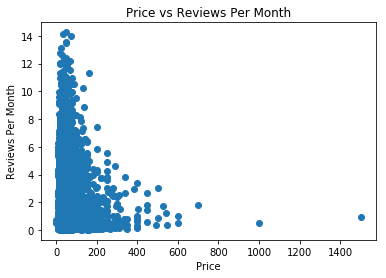

In [106]:
plt.scatter(athens['price'], athens['reviews_per_month'])
plt.xlabel('Price')
plt.ylabel('Reviews Per Month')
plt.title('Price vs Reviews Per Month')
plt.show()

Used the plot to compare price to reviews per month and see if there is a correlation

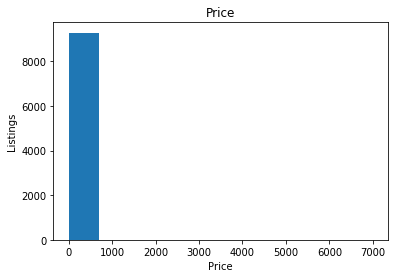

In [124]:
plt.hist(athens.price)
plt.xlabel('Price')
plt.ylabel('Listings')
plt.title('Price')
plt.show()

Attempted to look at price, but the plot was not useful

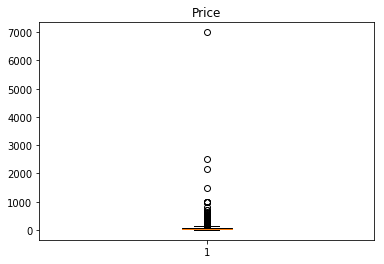

In [108]:
plt.boxplot(athens.price)
plt.title('Price')
plt.show()

Used a boxplot to id mean and outliers for price - the outliers made the boxplot difficult to read

In [7]:
athens_budget = athens.loc[athens.price <1000]

I created a new data frame that cut out some of the outliers, so that I could get more usable plots for analysis

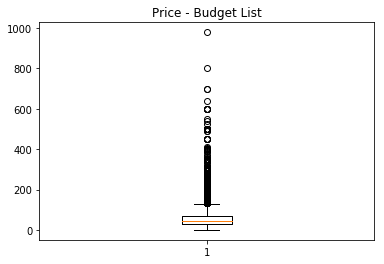

In [109]:
plt.boxplot(athens_budget.price)
plt.title('Price - Budget List')
plt.show()

I created a boxplot using the new dataframe for price - it is easier to read and more useful for analysis

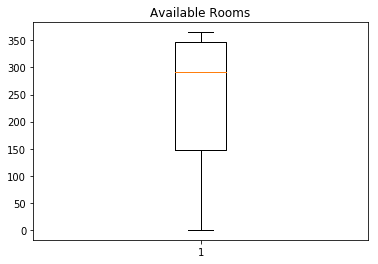

In [110]:
plt.boxplot(athens.availability_365)
plt.title('Available Rooms')
plt.show()

I created a boxplot to find mean and outliers for availability using the new data frame.
I found that there are a lot of listings that are available for a large number of days

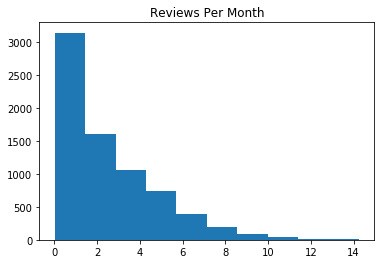

In [111]:
plt.hist(athens.reviews_per_month.dropna())
plt.title('Reviews Per Month')
plt.show()

Created a histogram for reviews per month, dropping the null points for accuracy and a more understandable plot

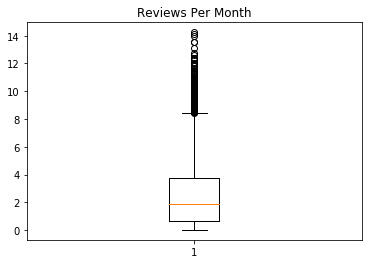

In [112]:
plt.boxplot(athens.reviews_per_month.dropna())
plt.title('Reviews Per Month')
plt.show()

Created a boxplot for reviews per month to see the mean and outliers

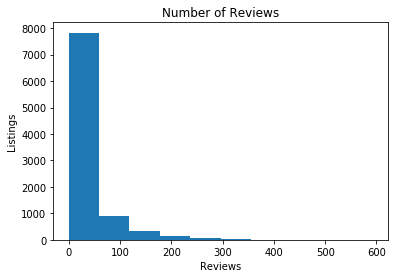

In [21]:
plt.hist(athens.number_of_reviews.dropna())
plt.title('Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Listings')
plt.show()

Created a histogram for total number of reviews

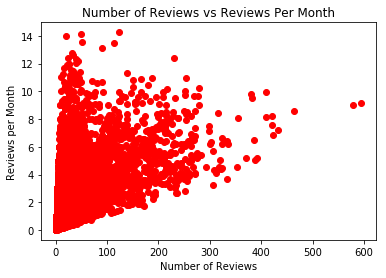

In [114]:
plt.scatter(athens.number_of_reviews.dropna(), athens.reviews_per_month, color='red')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.title('Number of Reviews vs Reviews Per Month')
plt.show()

Created a scatter plot to see the correlation of number of reviews and reviews per month

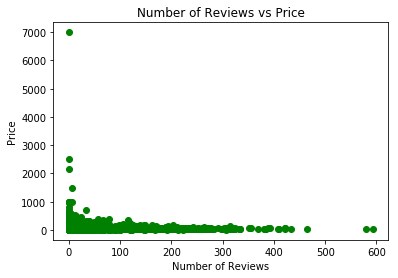

In [115]:
plt.scatter(athens.number_of_reviews.dropna(), athens.price, color='green')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews vs Price')
plt.show()

Created a plot to see the correlation of number of reviews and price - need to take out the outliers

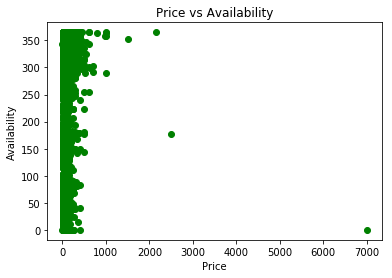

In [116]:
plt.scatter(athens.price, athens.availability_365, color='green')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.title('Price vs Availability')
plt.show()

Created a scatter plot to see the correlation between price and avaiability - need to take out the outliers

In [65]:
athens_budget.columns

Index(['price', 'reviews_per_month', 'number_of_reviews', 'availability_365'], dtype='object')

I wanted to see what columns are in the second data frame that I created and make sure that they all transferred over correctly

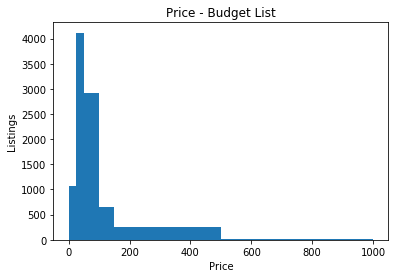

In [8]:
plt.hist(athens_budget.price, bins=[0, 25, 50, 100, 150, 200, 500, 1000])
plt.title('Price - Budget List')
plt.xlabel('Price')
plt.ylabel('Listings')
plt.show()

I created a plot and separated out the bins to get a better view of the prices of the listings

In [131]:
athens_budget.mean()

price                 60.442817
reviews_per_month      2.493792
number_of_reviews     29.605858
availability_365     237.669072
dtype: float64

I looked at the mean of the different points in the athens_budget data frame

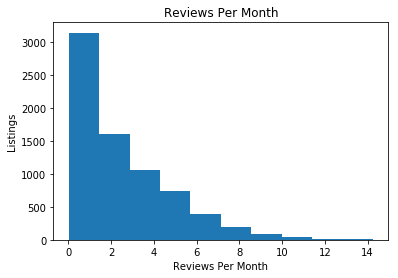

In [9]:
plt.hist(athens_budget.reviews_per_month.dropna())
plt.title('Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Listings')
plt.show()

I plotted number of reviews per month with the smaller data frame to get more useful data

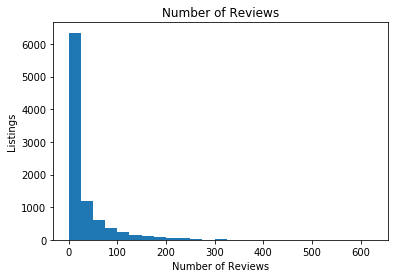

In [10]:
plt.hist(athens_budget.number_of_reviews.dropna(), bins=range(0, 650, 25))
plt.title('Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Listings')
plt.show()

I plotted total number of reviews with the smaller data frame to get more useful data

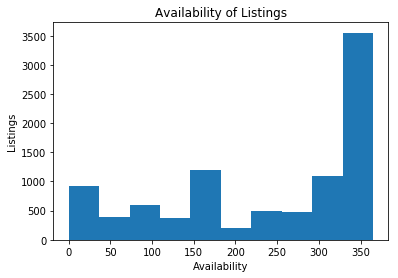

In [12]:
plt.hist(athens_budget.availability_365)
plt.xlabel('Availability')
plt.ylabel('Listings')
plt.title('Availability of Listings')
plt.show()

I plotted a histogram of the availability of the listings. There are a lot of listings that are available for large number of days

In [14]:
rooms = (athens.loc[athens.availability_365 > 0])

I created a data frame for availability that excludes those with 0 availability to make the data a bit more clear

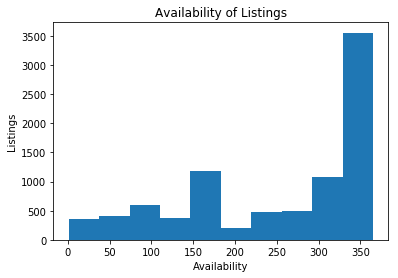

In [15]:
plt.hist(rooms.availability_365)
plt.xlabel('Availability')
plt.ylabel('Listings')
plt.title('Availability of Listings')
plt.show()

I created a plot using the new data frame that I just created

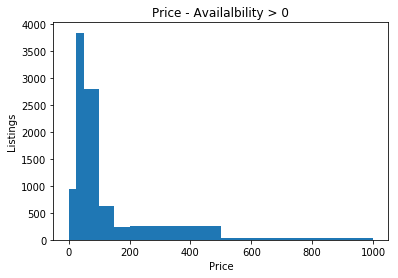

In [16]:
plt.hist(rooms.price, bins=[0, 25, 50, 100, 150, 200, 500, 1000])
plt.title('Price - Availalbility > 0')
plt.xlabel('Price')
plt.ylabel('Listings')          
plt.show()

I plotted the price using the new data frame

In [17]:
expense = (athens.loc[athens.price > 1000])

I created a data frame that only shows us room that cost more than 1000

In [79]:
print(expense)

      price  reviews_per_month  number_of_reviews  availability_365
925    1500               0.97                  6               353
1699   2154                NaN                  0               365
2495   2500                NaN                  0               177
8384   7000                NaN                  0                 0


I looked at rooms that cost more than 1000

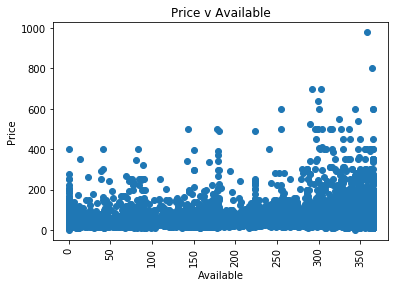

In [86]:
plt.scatter(athens_budget.availability_365, athens_budget.price)
plt.xticks(rotation=90)
plt.title('Price v Available')
plt.xlabel('Available')
plt.ylabel('Price')
plt.show()

I used the smaller data frame that only includes price < 1000 to look at price and availability

In [89]:
athens_budget.corr()

,price,reviews_per_month,number_of_reviews,availability_365
price,1.000000,-0.113431,-0.115154,0.150288
reviews_per_month,-0.113431,1.000000,0.525450,0.000988
number_of_reviews,-0.115154,0.525450,1.000000,0.072935
availability_365,0.150288,0.000988,0.072935,1.000000


Here, I looked at the correlation between the different columns in the data frame to look at the trends in the data.
In this table, positive correlation number suggests a trend. Looking at this, there is a correlation between number of reviews and reviews per month. This is the larget correlation in the table.

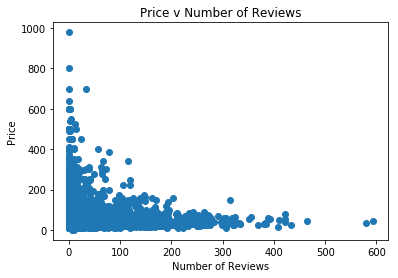

In [93]:
plt.scatter(athens_budget.number_of_reviews, athens_budget.price)
plt.title('Price v Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

Here, I am comparing number of reviews and price in the athens_budget data frame

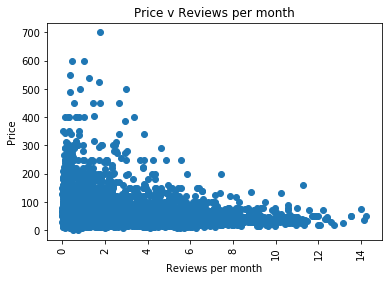

In [95]:
plt.scatter(athens_budget.reviews_per_month, athens_budget.price)
plt.xticks(rotation=90)
plt.title('Price v Reviews per month')
plt.xlabel('Reviews per month')
plt.ylabel('Price')
plt.show()

Here, I am comparing reviews per month and price in the athens_budget data frame.
This data is very similar to the plot above, which makes sense - the more reviews there are seems to generally mean 
that there are more reviews per month. 

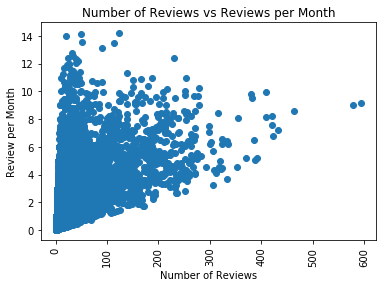

In [96]:
plt.scatter(athens_budget.number_of_reviews, athens_budget.reviews_per_month)
plt.xticks(rotation=90)
plt.title('Number of Reviews vs Reviews per Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Review per Month')
plt.show()

Comparing number of reviews and reviews per month in the athens_budget data frame

In [18]:
lessthan = (athens.loc[athens.availability_365 < 200])

I created a data frame for availability less than 200

In [98]:
morethan = (athens.loc[athens.availability_365 > 200])

I created a data frame for availability more than 200

I chose 200 as the number because it is a round number close the means of the data frame. I thought this would be a good dividing point

In [19]:
import scipy
from scipy.stats import ttest_ind

In [100]:
print(ttest_ind(lessthan.price, morethan.price, equal_var=False))

Ttest_indResult(statistic=-6.4190827239093515, pvalue=1.4958821174179829e-10)


Here, I used the t-test to check for significant statistical difference in two new data frames. What I found was there is a very significant difference in price between lessthan and morethan
The p-value confirms what the t-test is telling us - we can be fairly certain that there is significant difference. Those with less than 200 days available have a different price than those with more than 200 days available.

In [101]:
morethan.mean()

price                 68.168908
reviews_per_month      2.531791
number_of_reviews     34.100437
availability_365     325.443668
dtype: float64

Mean of morethan

In [20]:
lessthan.mean()

price                52.741791
reviews_per_month     2.420654
number_of_reviews    22.158294
availability_365     96.800730
dtype: float64

mean of lessthan

In order to maximize utility of the listings, perhaps we should lower our prices to get the rooms filled, thus bringing us more profit. Additionally, our rooms will be filled more frequently throughout the year.

## Further Research


Do reviews have an affect on room price? I would need a few years worth of data on reviews. Additionally, price history to see what the fluctuation was over those years.

A/B Testing:

I would make two fake listings - one with positive reviews and one with no reviews at all. Then I would 
send these fake listings out to see what people would charge for each room. 
My hypothesis is that the rooms with positive reviews will receive overall higher pricing, because of the 
perceived higher quality of the rooms. The way I would evaluate this experiment is by the key metric of price.
I am trying to find if the total amount of positive reviews will allow me to raise my price without 
affecting the amount of business that I can bring in. If I find that price does not matter as much as 
customer satisfaction, then I can use that in my business model.